In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0EVld0-MR6Re7iaXTt3LddqOgBU_kelruPKGaI9EJppd',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'lea-donotdelete-pr-x6byzjxqy69trm'
object_key = 'DistrictswiseCR_AEdataf_24-25-26.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_1 = pd.read_csv(body)
df_1.head(10)


,Category,States/UT's,Districts,No. of CSCs,Female,Male,Total,General,OBC,SC,ST,Total.1
0,Case Registered,Andaman and Nicobar,Nicobar,5,615,852,1467,557,315,546,49,1467
1,Case Registered,Andaman and Nicobar,North and Middle Andaman,37,765,1114,1879,199,187,1436,57,1879
2,Case Registered,Andaman and Nicobar,South Andaman,31,340,251,591,42,89,430,30,591
3,Case Registered,Andhra Pradesh,Alluri Sitharama Raju,430,6370,6828,13198,3585,4660,3176,1777,13198
4,Case Registered,Andhra Pradesh,Anakapalli,646,6311,6267,12578,3532,4196,4347,503,12578
5,Case Registered,Andhra Pradesh,Anantapur,577,10050,21628,31678,9189,8651,12245,1593,31678
6,Case Registered,Andhra Pradesh,Annamayya,501,2039,1181,3220,1173,776,1118,153,3220
7,Case Registered,Andhra Pradesh,Bapatla,461,1756,1960,3716,1729,680,1120,187,3716
8,Case Registered,Andhra Pradesh,Chittoor,724,24254,12256,36510,19944,8818,7115,633,36510
9,Case Registered,Andhra Pradesh,East Godavari,300,5908,7332,13240,7032,3230,2370,608,13240


In [2]:
df_1.info()

df_1.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     1572 non-null   object
 1   States/UT's  1572 non-null   object
 2   Districts    1572 non-null   object
 3   No. of CSCs  1572 non-null   int64 
 4   Female       1572 non-null   int64 
 5   Male         1572 non-null   int64 
 6   Total        1572 non-null   int64 
 7   General      1572 non-null   int64 
 8   OBC          1572 non-null   int64 
 9   SC           1572 non-null   int64 
 10  ST           1572 non-null   int64 
 11  Total.1      1572 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 147.5+ KB


,Category,States/UT's,Districts,No. of CSCs,Female,Male,Total,General,OBC,SC,ST,Total.1
count,1572,1572,1572,1572.000000,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03
unique,4,38,791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Case Registered,Uttar Pradesh,Nicobar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,785,150,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,636.132316,1.015027e+04,1.581586e+04,2.596613e+04,6.030291e+03,8.225906e+03,8.219697e+03,3.490233e+03,2.596613e+04
std,NaN,NaN,NaN,8907.104216,1.422710e+05,2.217056e+05,3.639101e+05,8.458425e+04,1.154120e+05,1.152801e+05,4.899153e+04,3.639101e+05
min,NaN,NaN,NaN,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,100.000000,8.307500e+02,1.292750e+03,2.243250e+03,3.060000e+02,4.557500e+02,4.437500e+02,8.700000e+01,2.243250e+03
50%,NaN,NaN,NaN,248.500000,2.342500e+03,3.713500e+03,6.238000e+03,1.305000e+03,1.637500e+03,1.602500e+03,4.470000e+02,6.238000e+03
75%,NaN,NaN,NaN,470.000000,6.185250e+03,9.239250e+03,1.583775e+04,3.403750e+03,4.688500e+03,4.471250e+03,1.716250e+03,1.583775e+04


In [3]:
df_1.isnull().sum()

Category       0
States/UT's    0
Districts      0
No. of CSCs    0
Female         0
Male           0
Total          0
General        0
OBC            0
SC             0
ST             0
Total.1        0
dtype: int64

In [4]:
df_1.columns = [col.strip().replace(' ', '_') for col in df_1.columns]
print(df_1.columns)

Index(['Category', 'States/UT's', 'Districts', 'No._of_CSCs', 'Female', 'Male',
       'Total', 'General', 'OBC', 'SC', 'ST', 'Total.1'],
      dtype='object')


In [5]:
gender_df = df_1[['Districts', 'Female', 'Male']].copy()

gender_melted = gender_df.melt(id_vars='Districts', 
                                value_vars=['Female', 'Male'], 
                                var_name='Gender', 
                                value_name='Case_Registrations')

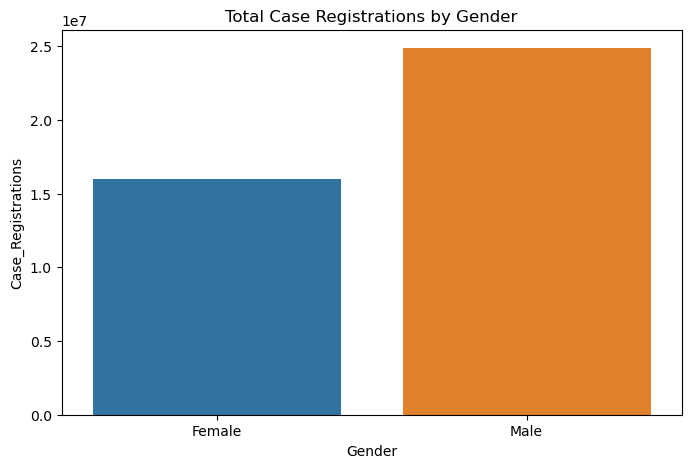

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=gender_melted, x='Gender', y='Case_Registrations', estimator='sum', errorbar=None)
plt.title('Total Case Registrations by Gender')
plt.show()

In [7]:
caste_df = df_1[['Districts', 'General', 'OBC', 'SC', 'ST']].copy()

caste_melted = caste_df.melt(id_vars='Districts', 
                             value_vars=['General', 'OBC', 'SC', 'ST'],
                             var_name='Caste_Category',
                             value_name='Case_Registrations')

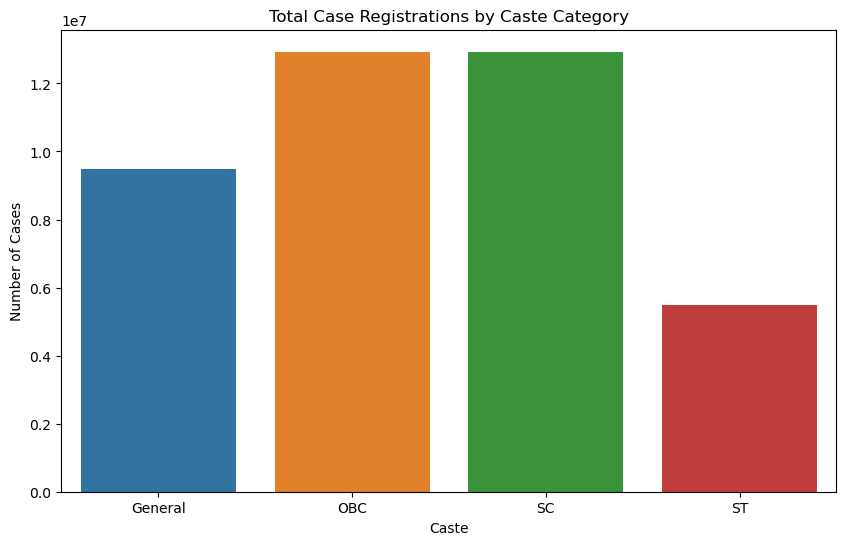

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=caste_melted, x='Caste_Category', y='Case_Registrations', estimator='sum', errorbar=None)
plt.title('Total Case Registrations by Caste Category')
plt.xlabel('Caste')
plt.ylabel('Number of Cases')
plt.show()

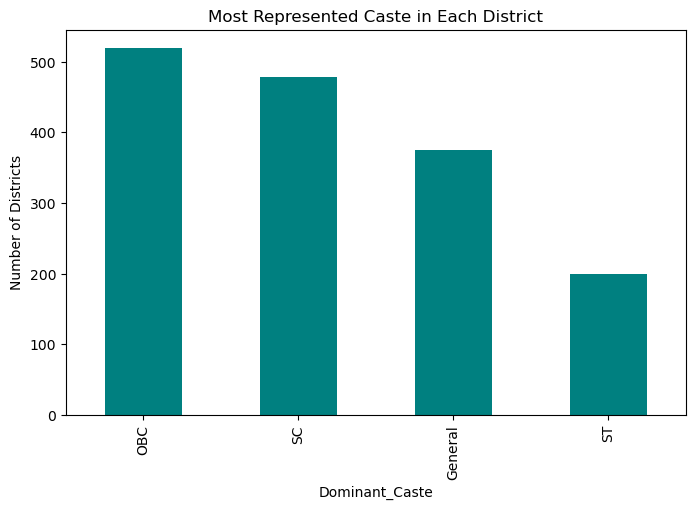

In [9]:
caste_df['Dominant_Caste'] = caste_df[['General', 'OBC', 'SC', 'ST']].idxmax(axis=1)

dominant_counts = caste_df['Dominant_Caste'].value_counts()

plt.figure(figsize=(8,5))
dominant_counts.plot(kind='bar', color='teal')
plt.title('Most Represented Caste in Each District')
plt.ylabel('Number of Districts')
plt.show()

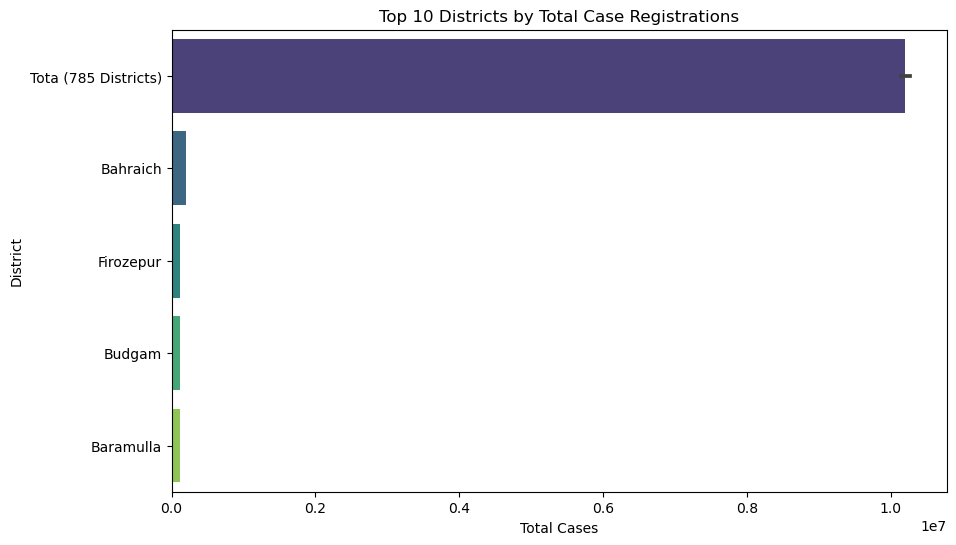

In [10]:
top_districts = df_1[['Districts', 'Total']].sort_values(by='Total', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_districts, y='Districts', x='Total', palette='viridis')
plt.title('Top 10 Districts by Total Case Registrations')
plt.xlabel('Total Cases')
plt.ylabel('District')
plt.show()

In [11]:
df_1.columns = df_1.columns.str.strip()

In [12]:
print(df_1.columns.tolist())

['Category', "States/UT's", 'Districts', 'No._of_CSCs', 'Female', 'Male', 'Total', 'General', 'OBC', 'SC', 'ST', 'Total.1']


In [13]:
df_1['Cases_per_CSC'] = df_1['Total'] / df_1['No._of_CSCs']
df_1[['Districts', 'Cases_per_CSC']].head() 

,Districts,Cases_per_CSC
0,Nicobar,293.400000
1,North and Middle Andaman,50.783784
2,South Andaman,19.064516
3,Alluri Sitharama Raju,30.693023
4,Anakapalli,19.470588


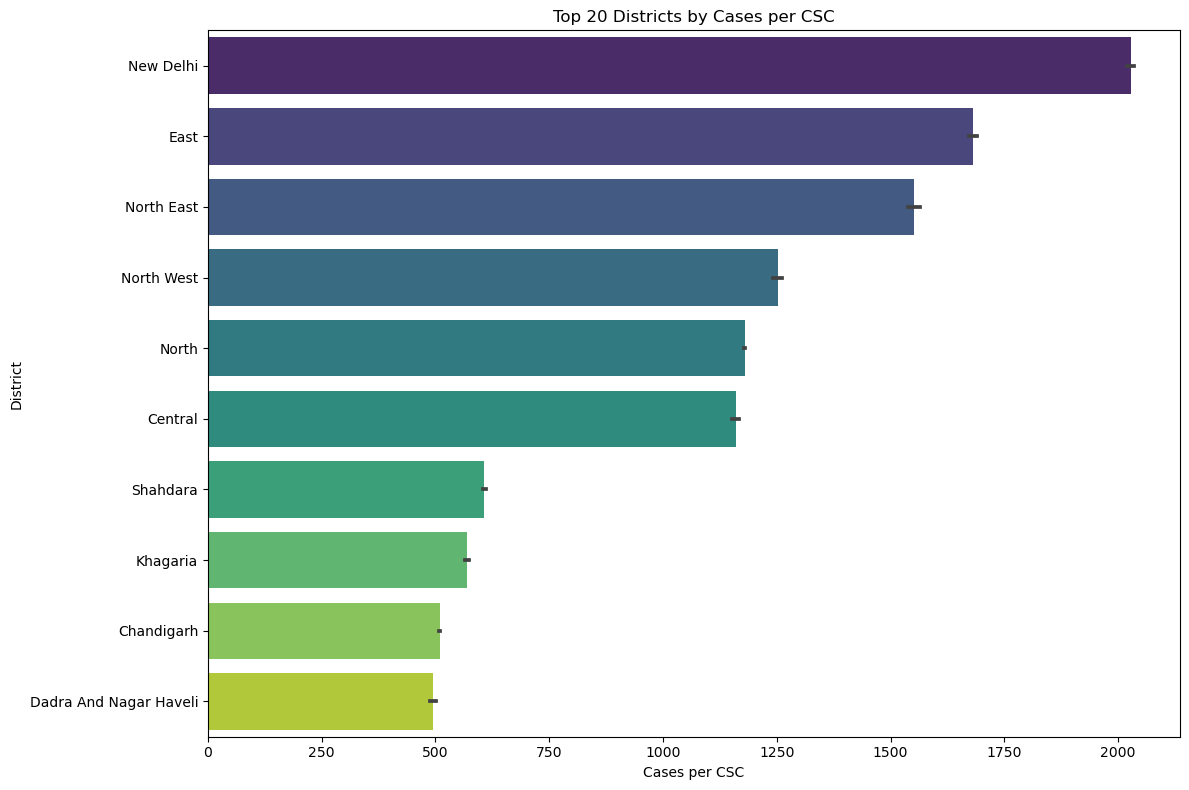

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

top_districts_csc = df_1[['Districts', 'Cases_per_CSC']].sort_values(by='Cases_per_CSC', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_districts_csc, y='Districts', x='Cases_per_CSC', palette='viridis')
plt.title('Top 20 Districts by Cases per CSC')
plt.xlabel('Cases per CSC')
plt.ylabel('District')
plt.tight_layout()
plt.show()

In [15]:
state_summary = df_1.groupby("States/UT's").agg({
    'Total': 'sum',
    'No._of_CSCs': 'sum'
}).reset_index()

state_summary['Cases_per_CSC'] = state_summary['Total'] / state_summary['No._of_CSCs']

state_summary.head()

,States/UT's,Total,No._of_CSCs,Cases_per_CSC
0,Andaman and Nicobar,7673,146,52.554795
1,Andhra Pradesh,651520,26722,24.381409
2,Arunachal Pradesh,41115,3612,11.382890
3,Assam,473986,4402,107.675148
4,Bihar,1100029,16770,65.595051


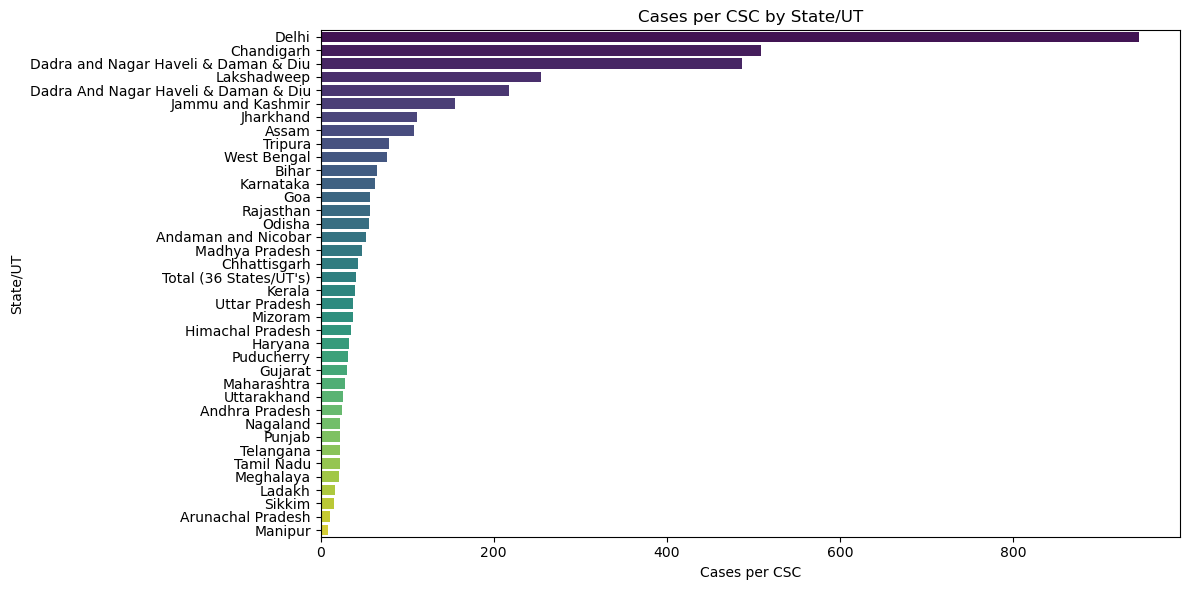

In [16]:
state_summary_sorted = state_summary.sort_values(by='Cases_per_CSC', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=state_summary_sorted, x='Cases_per_CSC', y="States/UT's", palette="viridis")
plt.title("Cases per CSC by State/UT")
plt.xlabel("Cases per CSC")
plt.ylabel("State/UT")
plt.tight_layout()
plt.show()

In [17]:
category_totals = {
    'General': df_1['General'].sum(),
    'OBC': df_1['OBC'].sum(),
    'SC': df_1['SC'].sum(),
    'ST': df_1['ST'].sum()
}

category_df = pd.DataFrame(list(category_totals.items()), columns=['Caste_Category', 'Total_Cases'])

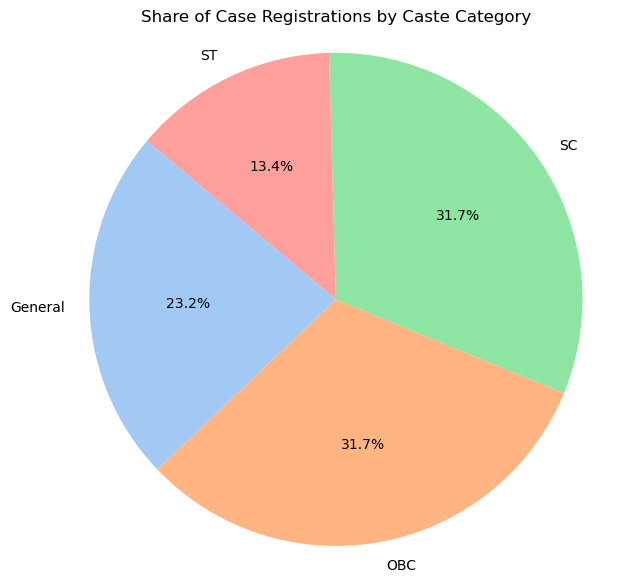

In [18]:
plt.figure(figsize=(7,7))
plt.pie(category_df['Total_Cases'], labels=category_df['Caste_Category'], 
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Share of Case Registrations by Caste Category')
plt.axis('equal')
plt.show()

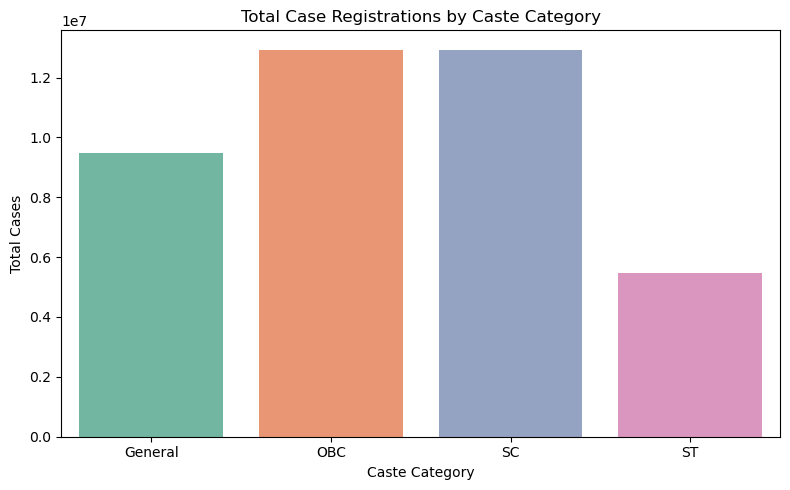

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(data=category_df, x='Caste_Category', y='Total_Cases', palette='Set2')
plt.title('Total Case Registrations by Caste Category')
plt.xlabel('Caste Category')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()

In [20]:
category_df.columns

Index(['Caste_Category', 'Total_Cases'], dtype='object')

In [21]:
category_df.columns.tolist()

['Caste_Category', 'Total_Cases']

In [22]:
df_1['Cases_per_CSC'] = df_1['Total'] / df_1['No._of_CSCs']
df_1[['Districts', 'Cases_per_CSC']].head()

,Districts,Cases_per_CSC
0,Nicobar,293.400000
1,North and Middle Andaman,50.783784
2,South Andaman,19.064516
3,Alluri Sitharama Raju,30.693023
4,Anakapalli,19.470588


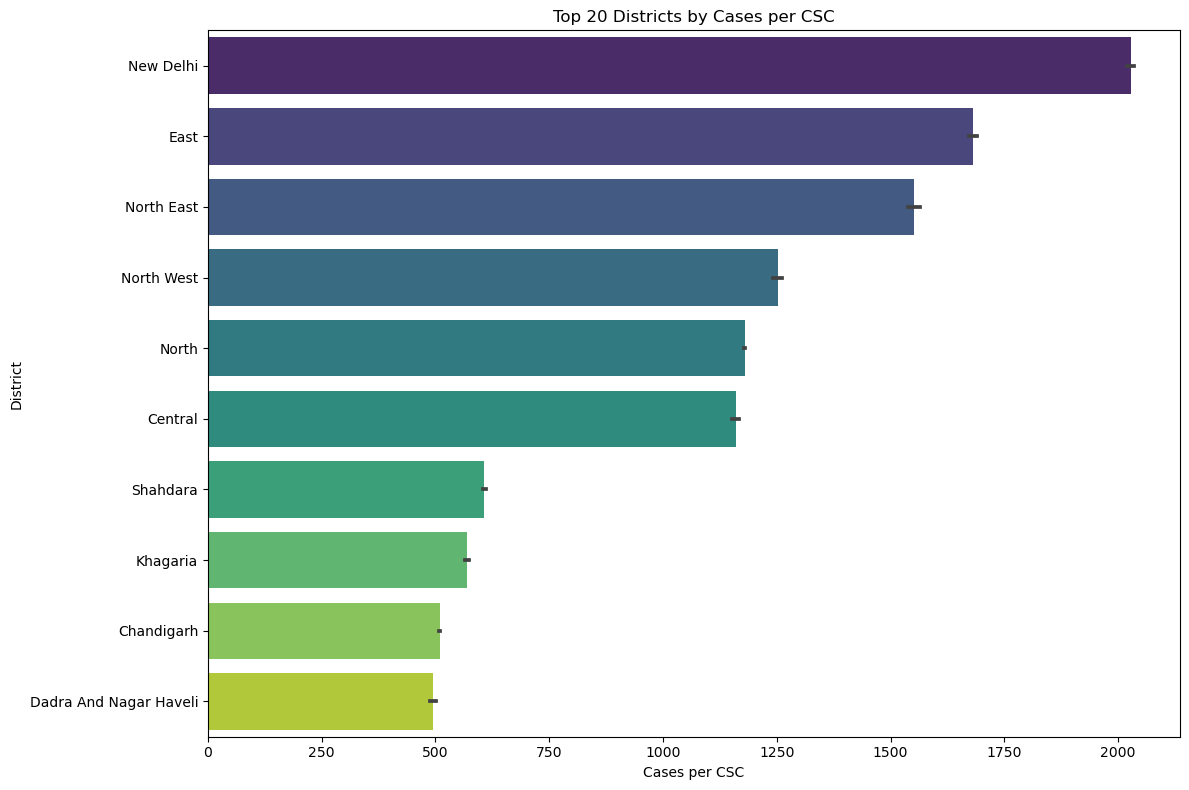

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

top_districts_csc = df_1[['Districts', 'Cases_per_CSC']].sort_values(by='Cases_per_CSC', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_districts_csc, y='Districts', x='Cases_per_CSC', palette='viridis')
plt.title('Top 20 Districts by Cases per CSC')
plt.xlabel('Cases per CSC')
plt.ylabel('District')
plt.tight_layout()
plt.show()

In [24]:
category_df['Percentage_Share'] = category_df['Total_Cases'] / category_df['Total_Cases'].sum() * 100

ideal_percentage = 100 / len(category_df)

category_df['Deviation'] = abs(category_df['Percentage_Share'] - ideal_percentage)

category_df['Caste_Equity_Index'] = 100 - category_df['Deviation']

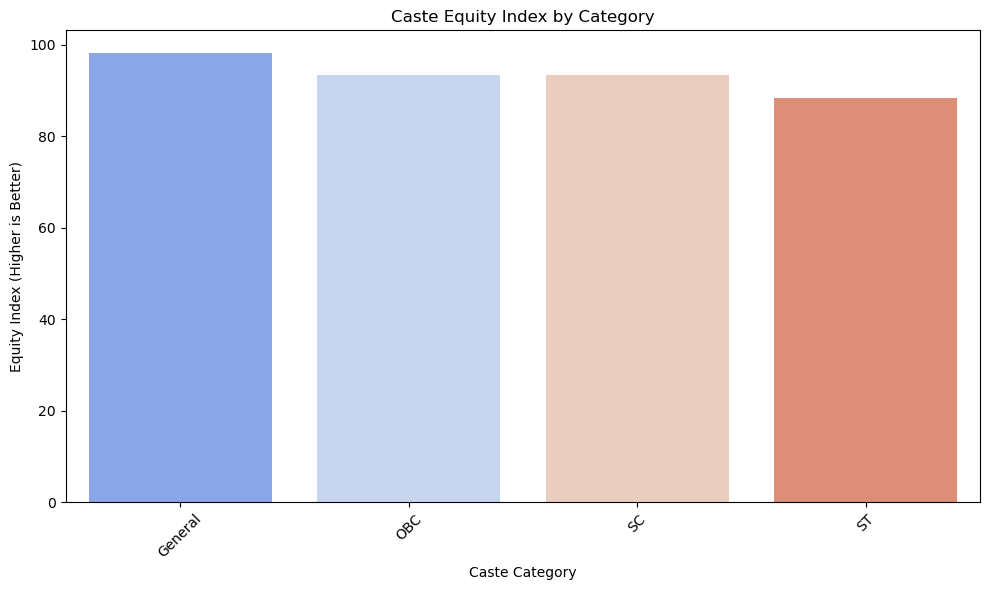

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data=category_df, x='Caste_Category', y='Caste_Equity_Index', palette='coolwarm')
plt.title('Caste Equity Index by Category')
plt.xlabel('Caste Category')
plt.ylabel('Equity Index (Higher is Better)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
df_1.columns.tolist()

['Category',
 "States/UT's",
 'Districts',
 'No._of_CSCs',
 'Female',
 'Male',
 'Total',
 'General',
 'OBC',
 'SC',
 'ST',
 'Total.1',
 'Cases_per_CSC']

In [27]:
gender_data = df_1[['Female', 'Male']].copy()

gender_melted = gender_data.melt(var_name='Gender', value_name='Cases')

gender_melted.dropna(inplace=True)
gender_melted['Cases'] = pd.to_numeric(gender_melted['Cases'], errors='coerce')

gender_grouped = gender_melted.groupby('Gender')['Cases'].sum().reset_index()
gender_grouped.rename(columns={'Cases': 'Total Cases Registered'}, inplace=True)
total_cases = gender_grouped['Total Cases Registered'].sum()
gender_grouped['Percentage_Share'] = (gender_grouped['Total Cases Registered'] / total_cases) * 100

gender_grouped['Equity_Score'] = 100 - abs(gender_grouped['Percentage_Share'] - 50)

gender_grouped

,Gender,Total Cases Registered,Percentage_Share,Equity_Score
0,Female,15956220,39.090416,89.090416
1,Male,24862532,60.909584,89.090416


In [28]:
caste_data = df_1[['General', 'OBC', 'SC', 'ST']].copy()

caste_melted = caste_data.melt(var_name='Caste', value_name='Cases')
caste_melted.dropna(inplace=True)
caste_melted['Cases'] = pd.to_numeric(caste_melted['Cases'], errors='coerce')
caste_grouped = caste_melted.groupby('Caste')['Cases'].sum().reset_index()
caste_grouped.rename(columns={'Cases': 'Total Cases Registered'}, inplace=True)
total_caste_cases = caste_grouped['Total Cases Registered'].sum()
caste_grouped['Percentage_Share'] = (caste_grouped['Total Cases Registered'] / total_caste_cases) * 100

caste_grouped['Equity_Score'] = 100 - abs(caste_grouped['Percentage_Share'] - 25)

caste_grouped

,Caste,Total Cases Registered,Percentage_Share,Equity_Score
0,General,9479618,23.223684,98.223684
1,OBC,12931124,31.679371,93.320629
2,SC,12921364,31.655461,93.344539
3,ST,5486646,13.441484,88.441484


In [29]:
data = {
    'Gender': ['Female', 'Male'],
    'Total_Cases_Registered': [15956220, 24862532],
    'Percentage_Share': [39.090416, 60.909584],
    'Equity_Score': [89.090416, 89.090416]
}

df_equity_final = pd.DataFrame(data)

In [30]:
data = {
    'Gender': ['Female', 'Male', 'Female', 'Male'],
    'Total Cases Registered': [120, 180, 95, 205],
}
df_clean = pd.DataFrame(data)

total_cases = df_clean['Total Cases Registered'].sum()
df_clean['Percentage_Share'] = df_clean['Total Cases Registered'] / total_cases * 100
national_avg = df_clean['Percentage_Share'].mean()
df_clean['Equity_Score'] = 100 - abs(df_clean['Percentage_Share'] - national_avg)
df_equity = df_clean[['Gender', 'Total Cases Registered', 'Percentage_Share', 'Equity_Score']]

df_equity.head()

,Gender,Total Cases Registered,Percentage_Share,Equity_Score
0,Female,120,20.000000,95.000000
1,Male,180,30.000000,95.000000
2,Female,95,15.833333,90.833333
3,Male,205,34.166667,90.833333


In [31]:
from sklearn.preprocessing import LabelEncoder

df_model = df_clean.copy()

le = LabelEncoder()
df_model['Gender_Encoded'] = le.fit_transform(df_model['Gender'])  # Female=0, Male=1

In [32]:
X = df_model[['Gender_Encoded', 'Total Cases Registered']]
y = df_model['Equity_Score']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MSE:", mse)
print("R²:", r2)

MSE: 4.340277777777758
R²: 3.4416913763379853e-15


In [35]:
#installations
%pip install image | tail -n 1
%pip install -U "ibm_watsonx_ai>=1.1.14" | tail -n 1

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [36]:
import requests
import base64
import getpass
import textwrap

from PIL import Image
from ibm_watsonx_ai import Credentials
from ibm_watsonx_ai.foundation_models import ModelInference

In [38]:
WATSONX_EU_APIKEY = ("E4OzDrjPUTdao98Q6jx7adzy59kionGiUGncYmmIfau9")

WATSONX_EU_PROJECT_ID = ("e071200b-5070-40ee-b102-a1eb0f2c81eb")

URL = "https://us-south.ml.cloud.ibm.com"

In [4]:
credentials = Credentials(
    url="https://us-south.ml.cloud.ibm.com",
    api_key="E4OzDrjPUTdao98Q6jx7adzy59kionGiUGncYmmIfau9"
)

In [5]:
%pip install -U "ibm_watsonx_ai>=1.1.14"

Note: you may need to restart the kernel to use updated packages.


In [9]:
from ibm_watsonx_ai.metanames import GenTextParamsMetaNames as GenParams
from ibm_watsonx_ai.credentials import Credentials

credentials = Credentials(
    url="https://us-south.ml.cloud.ibm.com",
    api_key="E4OzDrjPUTdao98Q6jx7adzy59kionGiUGncYmmIfau9"
)

In [12]:
!pip show ibm_watsonx_ai

Name: ibm_watsonx_ai
Version: 1.3.32
Summary: IBM watsonx.ai API Client
Home-page: 
Author: IBM
Author-email: 
License: BSD-3-Clause
Location: /opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages
Requires: cachetools, certifi, httpx, ibm-cos-sdk, lomond, packaging, pandas, requests, tabulate, urllib3
Required-by: langchain-ibm


In [14]:
from ibm_watsonx_ai.foundation_models import ModelInference

model_id = "ibm/granite-13b-instruct-v2"

parameters = {
    "decoding_method": "greedy",
    "max_new_tokens": 300,
    "temperature": 0.7
}

model = ModelInference(
    model_id=model_id,
    params=parameters,
    credentials=credentials,
    project_id="e071200b-5070-40ee-b102-a1eb0f2c81eb"
)

response = model.generate_text("Explain legal equity in simple terms.")
print(response)


/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/ibm_watsonx_ai/foundation_models/utils/utils.py:436: LifecycleWarning: Model 'ibm/granite-13b-instruct-v2' is in deprecated state from 2025-06-18 until 2025-10-15. IDs of alternative models: ibm/granite-3-3-8b-instruct. Further details: https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/fm-model-lifecycle.html?context=wx&audience=wdp
  warn(model_state_warning, category=LifecycleWarning)


Equity is the difference between the fair market value of an asset and the amount of money owed on it. 
